주성분분석-유방암
==

- 먼저 20% 중요 데이터만 사용, SelectPercentile
- 주성분 분석
- t-SNE 

In [ ]:
import numpy 

In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn import feature_selection
from sklearn.feature_selection import SelectPercentile
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
cancer = load_breast_cancer()

In [9]:
X_all = cancer.data
y = cancer.target

In [14]:
type(cancer)

sklearn.utils.Bunch

### 표준 정규화
- X_all

In [10]:
sc = StandardScaler()
X_all = sc.fit_transform(X_all)

In [11]:
X_all.shape

(569, 30)

In [13]:
cancer.columns

AttributeError: columns

In [7]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

## 30개의 특성을 모두 사용하는 경우

In [16]:
rfc = RandomForestClassifier(n_estimators=200)

In [17]:
## 교차검증
cross_val_score(rfc, X_all, y, cv=5).mean().round(4)

0.9633

## 일부 특성만(20%, 6개) 사용하는 경우

### 어떤 속성을 선택하는 것이 좋을지를 컴퓨터가 자동으로 찾아 주는 방법
- #### 가장 널리 사용되는 방법
    - 목적 변수와 상관관계가 높은 변수들을 찾는 것 
    
### SelectPercentile()
- #### 상관관계가 높은 순서대로 속성들을 나열하고 
- #### 상위 몇 %까지의 특성을 선택해 주는 함수
- #### 기준 : chi2 (카이제곱 분포에 따른 검정)

In [10]:
fs = SelectPercentile(feature_selection.chi2, percentile = 20)

### 상위 20% 특징 데이터 & 표준 정규화
- X_P

In [11]:
X_P = fs.fit_transform(cancer.data, y)
X_P = sc.fit_transform(X_P)

### get_support()
- 선택된 열을 불리언 형식으로 표현 (True, False, ...)

In [12]:
cancer.feature_names[fs.get_support()]

array(['mean perimeter', 'mean area', 'area error', 'worst radius',
       'worst perimeter', 'worst area'], dtype='<U23')

In [13]:
cross_val_score(rfc, X_P, y).mean().round(4)

C:\Users\ojkwon\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.928

## 일부 특성만(6%, 2개) 사용하는 경우

In [14]:
# 상위 20%의 유효한 특성만 선택 (6개))
fs = SelectPercentile(feature_selection.chi2, percentile = 6)
X_P = fs.fit_transform(cancer.data, y)
X_P = sc.fit_transform(X_P)
cancer.feature_names[fs.get_support()]

array(['mean area', 'worst area'], dtype='<U23')

In [15]:
cancer.data.shape, X_P.shape

((569, 30), (569, 2))

In [16]:
cross_val_score(rfc, X_P, y).mean().round(4)

C:\Users\ojkwon\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.9192

## 주성분 분석(PCA)로 2개의 차원만 사용하는 경우

In [17]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_all)

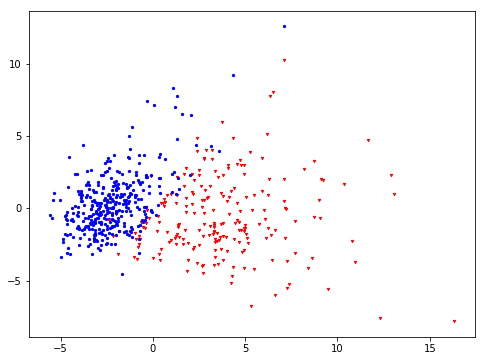

In [18]:
m = ['v', 'o']
c = ['r','b']
plt.figure(figsize=(8,6))
for i in range(len(y)):
    plt.scatter(pca_result[:,0][i],pca_result[:,1][i], marker=m[y[i]], c=c[y[i]], s=5)
plt.show()

#### pca.components_ 
- 두 개의 주성분을 만들기 위해서 
- 기존의 30개의 특성에 각각 어떤 가중치를 곱하였는지를 알려주는 내부변수

In [19]:
pca.components_.round(3)

array([[ 0.219,  0.104,  0.228,  0.221,  0.143,  0.239,  0.258,  0.261,
         0.138,  0.064,  0.206,  0.017,  0.211,  0.203,  0.015,  0.17 ,
         0.154,  0.183,  0.042,  0.103,  0.228,  0.104,  0.237,  0.225,
         0.128,  0.21 ,  0.229,  0.251,  0.123,  0.132],
       [-0.234, -0.06 , -0.215, -0.231,  0.186,  0.152,  0.06 , -0.035,
         0.19 ,  0.367, -0.106,  0.09 , -0.089, -0.152,  0.204,  0.233,
         0.197,  0.13 ,  0.184,  0.28 , -0.22 , -0.045, -0.2  , -0.219,
         0.172,  0.144,  0.098, -0.008,  0.142,  0.275]])

#### pca.explained_variance_ratio_
- 각 주성분 요소들이 얼마나 데이터를 잘 설명하는지를 알려준다

In [20]:
pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_)

(array([0.44272026, 0.18971182]), 0.6324320765155943)

## 2개의 주성분만 사용하여 분류를 수행

In [21]:
cross_val_score(rfc, pca_result, y, cv=5).mean().round(4)

0.9332

## 6개의 주성분만 사용하여 분류를 수행

In [22]:
pca = PCA(n_components=6)
pca_result = pca.fit_transform(X_all)
cross_val_score(rfc, pca_result, y, cv=5).mean().round(4)

0.9491

### 성능 비교 (PCA의 경우, 개선)
- 30개 특성 모두 사용했을 때의 성능 : 0.965
- SelectPercentile()을 이용한 특성 선택(2개, 6개)
- pca를 사용해서 특성을 선택(2개, 6개)

## t-SNE 시각화
- 다차원 공간의 특성들의 관계를 사람이 볼 수 있도록
- 데이터를 2, 3차원 이하로 변환하는 작업
- 비지도 학습의 일종
- https://www.linkedin.com/pulse/dimensionality-reduction-using-tsne-python-deepak-kumar

### TSNE : manifold learning algorithms
- perplexity
    - the number of nearest neighbors(학습에 영향을 이웃 데이터)
    - slelect a value between 5 and 50 
    - Larger datasets usually require a larger perplexity
    
- verbose 
    - Iterative display
    - specified as 0, 1, or 2. 
    - When Verbose is not 0, tsne prints a summary table of the Kullback-Leibler divergence and the norm of its gradient every NumPrint iterations.
  

In [28]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000)
tsne_results = tsne.fit_transform(cancer.data)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.026s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 33.679705
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.607338
[t-SNE] KL divergence after 1000 iterations: 0.215542


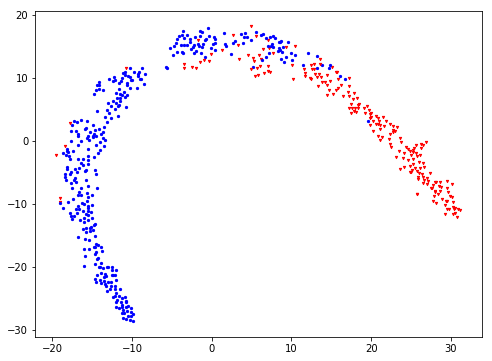

In [29]:
m = ['v','o']
c = ['r','b']
plt.figure(figsize=(8,6))
for i in range(len(y)):
    plt.scatter(tsne_results[:,0][i],tsne_results[:,1][i], marker=m[y[i]], c=c[y[i]], s=5)
plt.show()

### 표준화 후 시각화

In [30]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000)
tsne_results = tsne.fit_transform(X_all)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.073s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.522404
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.804604
[t-SNE] KL divergence after 1000 iterations: 0.890059


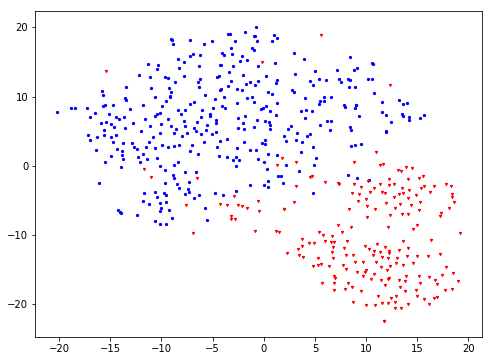

In [31]:
m = ['v','o']
c = ['r','b']
plt.figure(figsize=(8,6))
for i in range(len(y)):
    plt.scatter(tsne_results[:,0][i],tsne_results[:,1][i], marker=m[y[i]], c=c[y[i]], s=5)
plt.show()